In [1]:
#-*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
diabetes=pd.read_csv(r'C:\Users\Administrator\Desktop\diabetes\Machine-Learning-with-Python-master\diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [2]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#“结果”是我们将要预测的特征，0意味着未患糖尿病，1意味着患有糖尿病。在768个数据点中，500个被标记为0,268个标记为1。
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [4]:
#显示数据的维度
print("dimennsion of diabetes data:{}".format(diabetes.shape))

dimennsion of diabetes data:(768, 9)


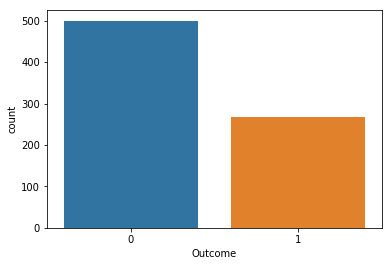

In [5]:
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count")

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


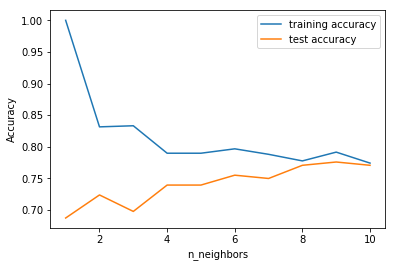

In [70]:
#首先用knn研究一下是否能够确认模型的复杂度和精确度之间的关系
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(diabetes.loc[:,diabetes.columns !='Outcome'],diabetes['Outcome'],stratify=diabetes['Outcome'],random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
#try n_neighbors from 1 to 10
neighbors_settings=range(1,11)
 
for n_neighbors in neighbors_settings:
    #build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    #record training set accuracy
    training_accuracy.append(knn.score(x_train,y_train))
    #record test set accuracy
    test_accuracy.append(knn.score(x_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [73]:
#逻辑回归算法
#正则化参数C=1（默认值）的模型在训练集上准确度为78%，在测试集上准确度为77%。
from sklearn. linear_model import LogisticRegression 
logreg=LogisticRegression(). fit(x_train,y_train)
print("Training set score:{:.3f}". format(logreg. score(x_train, y_train)))#精确到小数点后三位
print("Test set score:{:.3f}". format(logreg. score(x_test,y_test)))

Training set score:0.781
Test set score:0.771


In [74]:
#而将正则化参数C设置为100时，模型在训练集上准确度稍有提高但测试集上准确度略降，
#说明较少正则化和更复杂的模型并不一定会比默认参数模型的预测效果更好。
#所以我们选择默认值C=1
logreg100=LogisticRegression(C=100). fit(x_train,y_train)
print("Training set accuracy:{:.3f}". format(logreg100. score(x_train,y_train)))
print("Test set accuracy:{:.3f}". format(logreg100. score(x_test, y_test)))



Training set accuracy:0.785
Test set accuracy:0.766


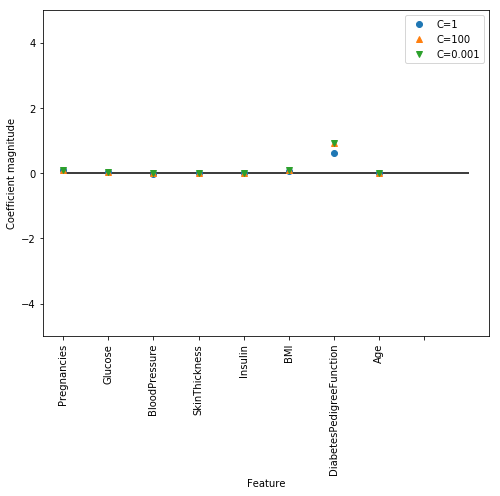

In [77]:
#用可视化的方式来看一下用三种不同正则化参数C所得模型的系数。
#更强的正则化(C = 0.001)会使系数越来越接近于零。仔细地看图，
#我们还能发现特征“DiabetesPedigreeFunction”（糖尿病遗传函数）在 C=100, C=1 和C=0.001的情况下, 系数都为正。
#这表明无论是哪个模型，DiabetesPedigreeFunction（糖尿病遗传函数）这个特征值都与样本为糖尿病是正相关的。
diabetes_features=[x for i,x in enumerate(diabetes. columns) if i!=8]
plt. figure(figsize=(8,6))
plt. plot(logreg. coef_.T,'o', label="C=1")
plt. plot(logreg100.coef_.T,'^', label="C=100")
plt. plot(logreg100.coef_.T,'v', label="C=0.001")
plt. xticks(range(diabetes. shape[1]), diabetes_features, rotation=90)
plt. hlines(0,0, diabetes. shape[1])
plt. ylim(-5,5)
plt. xlabel("Feature")
plt. ylabel("Coefficient magnitude")
plt. legend()
plt. savefig('1og_coef')




In [71]:
#决策树算法
from sklearn.tree import DecisionTreeClassifier 
tree=DecisionTreeClassifier(random_state=0)
tree. fit(x_train,y_train)
print("Accuracy on training set:{:.3f}". format(tree. score(x_train, y_train)))
print("Accuracy on test set:{:.3f}". format(tree. score(x_test, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.714


In [12]:
#训练集的准确度可以高达100%，而测试集的准确度相对就差了很多。这表明决策树是过度拟合的，不能对新数据产生好的效果。
#因此，我们需要对树进行预剪枝。
#我们设置max_depth=3，限制树的深度以减少过拟合。这会使训练集的准确度降低，但测试集准确度提高。
tree=DecisionTreeClassifier(max_depth=3, random_state=0)
tree. fit(x_train,y_train)
print("Accuracy on training set:{:.3f}". format(tree. score(x_train, y_train)))
print("Accuracy on test set:{:.3f}". format(tree. score(x_test, y_test)))

Accuracy on training set:0.773
Accuracy on test set:0.740


In [13]:
#决策树中特征重要度, 决策树中的特征重要度是用来衡量每个特征对于预测结果的重要性的。
#对每个特征有一个从0到1的打分，0表示“一点也没用”，1表示“完美预测”。各特征的重要度加和一定是为1的。
print("Feature importances:\n{}". format(tree. feature_importances_))

Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


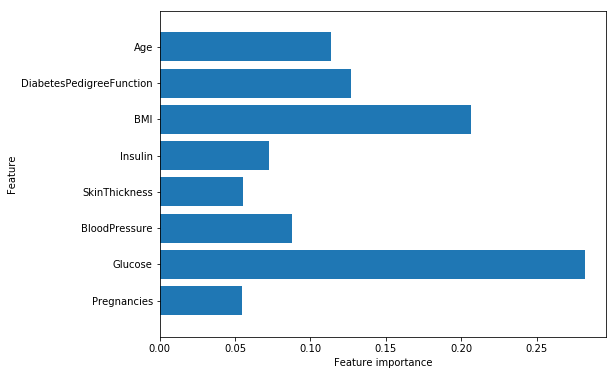

In [72]:
#可视化特征重要度，可以从图中看出，血糖是最重要的特征
#diabetes_features=[x for i,x in enumerate(diabetes.columns) if i!=8]
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_,align ='center')
    #plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
plot_feature_importances_diabetes(tree)
plt. savefig(' feature_importance')

In [28]:
#再用随机森林算法进行研究
from sklearn. ensemble import RandomForestClassifier 
rf=RandomForestClassifier(n_estimators=100, random_state=0)
rf. fit(x_train,y_train)
print("Accuracy on training set:{:.3f}". format(rf. score(x_train, y_train)))
print("Accuracy on test set:{:.3f}". format(rf. score(x_test, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.786


In [29]:
#没有更改任何参数的随机森林有78.6%的准确度，比逻辑回归和单一决策树的预测效果更好。
#再试试调整max_features设置，看看效果是否能够提高。
#可以看到结果并没有提高，这表明默认参数的随机森林在这里效果很好。
rf1=RandomForestClassifier(max_depth=3,n_estimators=100, random_state=0)
rf1. fit(x_train,y_train)
print("Accuracy on training set:{:.3f}". format(rf1. score(x_train, y_train)))
print("Accuracy on test set:{:.3f}". format(rf1. score(x_test, y_test)))

Accuracy on training set:0.800
Accuracy on test set:0.755


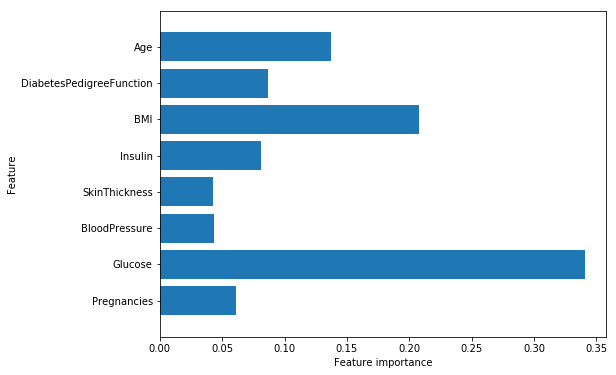

In [31]:
#随机森林的特征重要度：
#与单一决策树相似，随机森林的结果仍然显示特征“血糖”的重要度最高，
#但是它也同样显示“BMI（身体质量指数）”在整体中是第二重要的信息特征。
#随机森林的随机性促使算法考虑了更多可能的解释，这就导致随机森林捕获的数据比单一树要大得多。
plot_feature_importances_diabetes(rf1)

In [40]:
#梯度提升
from sklearn. ensemble import GradientBoostingClassifier 
gb=GradientBoostingClassifier(random_state=0)
gb. fit(x_train,y_train)
print("Accuracy on training set:{:.3f}". format(gb. score(x_train, y_train)))
print("Accuracy on test set:{:.3f}". format(gb. score(x_test, y_test)))

Accuracy on training set:0.917
Accuracy on test set:0.792


In [49]:
#上述可能是过拟合了。为了降低这种过拟合，我们可以通过限制最大深度或降低学习速率来进行更强的修剪:
#这里，我们限制最大深度为1
gb1=GradientBoostingClassifier(random_state=0, max_depth=1)
gb1. fit(x_train,y_train)
print("Accuracy on training set:{:.3f}". format(gb1. score(x_train, y_train)))
print("Accuracy on test set:{:.3f}". format(gb1. score(x_test, y_test)))
#降低学习速率
#如我们所期望的，两种降低模型复杂度的方法都降低了训练集的准确度。可是测试集的泛化性能并没有提高。

gb2=GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2. fit(x_train,y_train)
print("Accuracy on training set:{:.3f}". format(gb2. score(x_train, y_train)))
print("Accuracy on test set:{:.3f}". format(gb2. score(x_test, y_test)))

Accuracy on training set:0.804
Accuracy on test set:0.781
Accuracy on training set:0.802
Accuracy on test set:0.776


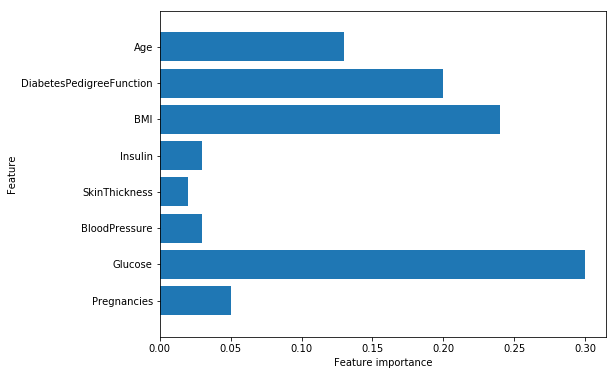

In [50]:
#通过特征重要度的可视化来对模型做更进一步的了解。
#我们可以看到，梯度提升树的特征重要度与随机森林的特征重要度有点类似，同时它给这个模型的所有特征赋了重要度值。
plot_feature_importances_diabetes(gb1)

In [52]:
#使用支持向量机算法
#SVM模型过拟合比较明显，虽然在训练集中有一个完美的表现，但是在测试集中仅仅有65%的准确度。
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
print("Accuracy on training set:{:.2f}". format(svc. score(x_train, y_train)))
print("Accuracy on test set:{:.2f}". format(svc. score(x_test, y_test)))

Accuracy on training set:1.00
Accuracy on test set:0.65


In [54]:
#SVM要求所有的特征要在相似的度量范围内变化。我们需要重新调整各特征值尺度使其基本上在同一量表上。
#从这个结果中，我们可以看到数据的度量标准化后效果大不同！现在我们的模型在训练集和测试集的结果非常相似，
#这其实是有一点过低拟合的，但总体而言还是更接近100%准确度的。
#这样来看，我们还可以试着提高C值或者gamma值来配适更复杂的模型。
from sklearn. preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
x_train_scaled=scaler. fit_transform(x_train)
x_test_scaled=scaler. fit_transform(x_test)
svc=SVC()
svc. fit(x_train_scaled,y_train)
print("Accuracy on training set:{:.2f}". format(svc. score(x_train_scaled,y_train)))
print("Accuracy on test set:{:.2f}". format(svc. score(x_test_scaled, y_test)))

Accuracy on training set:0.77
Accuracy on test set:0.77


In [55]:
#从这个结果中我们可以看到，提高了C值后，模型效果确实有一定提升，测试集准确度提至79.7%。
svc=SVC(C=1000)
svc. fit(x_train_scaled,y_train)
print("Accuracy on training set:{:.3f}". format(
svc. score(x_train_scaled,y_train)))
print("Accuracy on test set:{:.3f}". format(svc. score(x_test_scaled, y_test)))

Accuracy on training set:0.790
Accuracy on test set:0.797


In [56]:
#接下来使用深度学习算法
#从结果中我们可以看到，多层神经网络（MLP）的预测准确度并不如其他模型表现的好，这可能是数据的尺度不同造成的。

from sklearn. neural_network import MLPClassifier 
mlp=MLPClassifier(random_state=42)
mlp. fit(x_train,y_train)
print("Accuracy on training set:{:.2f}". format(mlp. score(x_train, y_train)))
print("Accuracy on test set:{:.2f}". format(mlp. score(x_test, y_test)))




Accuracy on training set:0.71
Accuracy on test set:0.67


In [58]:
#深度学习算法同样也希望所有输入的特征在同一尺度范围内变化。
#理想情况下，是均值为0，方差为1。所以，我们必须重新标准化我们的数据，以便能够满足这些需求。
from sklearn. preprocessing import StandardScaler 
scaler=StandardScaler()
x_train_scaled=scaler. fit_transform(x_train)
x_test_scaled=scaler. fit_transform(x_test)
mlp=MLPClassifier(random_state=0)
mlp. fit(x_train_scaled,y_train)
print("Accuracy on training set:{:.3f}". format(
mlp. score(x_train_scaled,y_train)))
print("Accuracy on test set:{:.3f}". format(mlp. score(x_test_scaled, y_test)))



Accuracy on training set:0.823
Accuracy on test set:0.802


e:\Anaconda2\envs\py3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [59]:
#增加迭代次数：
#从结果可以发现，增加迭代次数仅仅提升了训练集的性能，而对测试集没有效果。
mlp=MLPClassifier(max_iter=1000, random_state=0)
mlp. fit(x_train_scaled,y_train)
print("Accuracy on training set:{:.3f}". format(
mlp. score(x_train_scaled,y_train)))
print("Accuracy on test set:{:.3f}". format(mlp. score(x_test_scaled, y_test)))

Accuracy on training set:0.877
Accuracy on test set:0.755


In [ ]:
#使用调高alpha参数并且加强权重的正则化的方法。
#从运行结果来看，这个结果是好的，但我们无法更进一步提升测试集准确度。
mlp=MLPCLassifier(max_iter=1000, alpha=1, random_state=0)
mlp. fit(X_train_scaled,y_train)
print("Accuracy on training set:{:.3f}". format(
mlp. score(x_train_scaled,y_train)))
print("Accuracy on test set:{:.3f}". format(mlp. score(x_test_scaled, y_test)))


结论：因此，到目前为止我们最好的模型是在数据标准化后的默认参数深度学习模型。

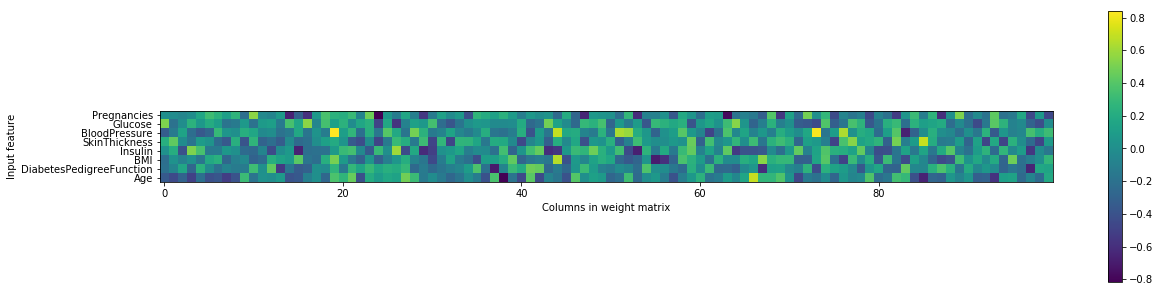

In [65]:
#最后，我们绘制了一个在糖尿病数据集上学习的神经网络的第一层权重热图。
#从这个热度图中，快速指出哪个或哪些特征的权重较高或较低是不容易的。
plt. figure(figsize=(20,5))
#plt. imshow(mlp.coefs_[0], interpolation=' none', cmap='viridis')
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt. yticks(range(8), diabetes_features)
plt. xlabel("Columns in weight matrix")
plt. ylabel("Input feature")
plt. colorbar()